In [1]:
#importing Libraries for data manipulation
import pandas as pd
import numpy as np
#importing Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Warnings library will be used to ignore some warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv & loading into a dataframe
loan_df = pd.read_csv(r"C:\Users\varun\Documents\UG\Case Study\Lending club\loan\loan.csv")

In [3]:
#Print the no of columns & rows 
loan_df.shape

(39717, 111)

In [4]:
# Showing the column names, their datatypes & no of non null values against each one of them
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data cleaning

In [5]:
# Deleting the columns with 100% null values
loan_df.dropna(axis=1,how='all',inplace=True)

In [6]:
# Over writing the dataframe by removing the columns which have only 1 unique value as they don't contribute to the EDA
loan_df = loan_df.loc[:,loan_df.nunique()>1]
# Removing id, member id, desc, URL
loan_df.drop(labels=['member_id','desc','url'],axis=1,inplace=True)
# Deleting Zip code since it is masked & not useful for analysis
loan_df.drop('zip_code',axis=1,inplace=True)

In [7]:
# Percentage of null values against each column shown below:
100*loan_df.isnull().sum()/loan_df.shape[0] 

id                          0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
title                       0.027696
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
r

In [8]:
# Deleting the columns with more than 10% of null values
null_perc = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
loan_df.drop(null_perc[ null_perc > 10 ].index, axis=1, inplace=True)

In [9]:
# Removing irrelevant columns because the person would have already defaulted hence would not be useful in EDA
loan_df.drop(['delinq_2yrs','last_credit_pull_d','last_pymnt_d','title','emp_title',
                          'revol_bal','out_prncp','out_prncp_inv','total_pymnt',
                          'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                          'collection_recovery_fee',
                          'last_pymnt_amnt'],axis=1,inplace=True)

In [10]:
df=loan_df.copy()
#loan_df=df.copy()
100*loan_df.isnull().sum()/loan_df.shape[0] 

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [11]:
# Imputing values for categorical columns - replacing them with their mode value
cate_col=['emp_length','pub_rec_bankruptcies']
for i in cate_col:
    loan_df[i].fillna(loan_df[i].mode()[0],inplace=True)
# Imputing values for numerical columns - replacing them with their median value after changing the datatype to float from object
loan_df.revol_util=loan_df.revol_util.apply(lambda x:  float(str(x).replace('%','')))
loan_df.revol_util.fillna(loan_df.revol_util.value_counts().median(),inplace=True)

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            39717 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [13]:
# Change the datatype of issue_d column from object to datatime 
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'],format='%b-%y')
loan_df['earliest_cr_line']=pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')

In [14]:
# Adding 3 derived columns year, month & day of week from issue_d column
loan_df['issue_d_year']=loan_df['issue_d'].dt.year
loan_df['issue_d_month']=loan_df['issue_d'].dt.month
loan_df['issue_d_weekday']=loan_df['issue_d'].dt.weekday

# Adding 2 derived columns year & month from earliest_cr_line column
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line_year'].apply(lambda x: int(str(x))-100 if int(str(x)) > 2024 else int(str(x)) )
loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month

In [15]:
# Converting int_rate column to float & analysing the values using describe function
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(str(x).split('%')[0]))
loan_df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [16]:
# Deriving another column from int_rate using below chart
##Low - 5 - 10
##Med - 10 - 15
##high - 15 - 20
##V_high > 20
loan_df['rate_category'] = loan_df['int_rate'].apply(lambda x: 'Low' if (x>=5 and x<=10) 
                                                     else 'Med' if (x>10 and x<=15) 
                                                     else 'High' if (x>15 and x<=20) 
                                                     else 'Very_High')

# Deriving another column from open_acc using below chart
##V_Low - 0 - 10
##Low    - 10 - 20
##Med    - 20 - 30
##high   - 30 - 40
##V_high > 40
loan_df['No_ofopen_CR_category'] = loan_df['open_acc'].apply(lambda x: 'Very_Low' if (x<=10) 
                                                     else 'Low' if (x>10 and x<=20)
                                                     else 'Med' if (x>20 and x<=30) 
                                                     else 'High' if (x>30 and x<=40) 
                                                     else 'Very_High')

loan_df['No_oftotal_CR_category'] = loan_df['total_acc'].apply(lambda x: 'Very_Low' if (x<=10) 
                                                     else 'Low' if (x>10 and x<=20)
                                                     else 'Med' if (x>20 and x<=30) 
                                                     else 'High' if (x>30 and x<=40) 
                                                     else 'Very_High')

In [17]:
# Removing the records where loan_status is current as they do not hold any significance if the person will default or not
loan_df = loan_df[loan_df.loan_status != 'Current']

In [18]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38577 non-null  int64         
 1   loan_amnt               38577 non-null  int64         
 2   funded_amnt             38577 non-null  int64         
 3   funded_amnt_inv         38577 non-null  float64       
 4   term                    38577 non-null  object        
 5   int_rate                38577 non-null  float64       
 6   installment             38577 non-null  float64       
 7   grade                   38577 non-null  object        
 8   sub_grade               38577 non-null  object        
 9   emp_length              38577 non-null  object        
 10  home_ownership          38577 non-null  object        
 11  annual_inc              38577 non-null  float64       
 12  verification_status     38577 non-null  object

In [19]:
Num_col = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','revol_util']
cate_col= ['term','rate_category','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status',
          'loan_status','purpose','title','addr_state','inq_last_6mths','No_ofopen_CR_category','pub_rec',
          'No_oftotal_CR_category','pub_rec_bankruptcies','issue_d_year','issue_d_month','issue_d_weekday',
          'earliest_cr_line_year','earliest_cr_line_month']

## Univariate analysis

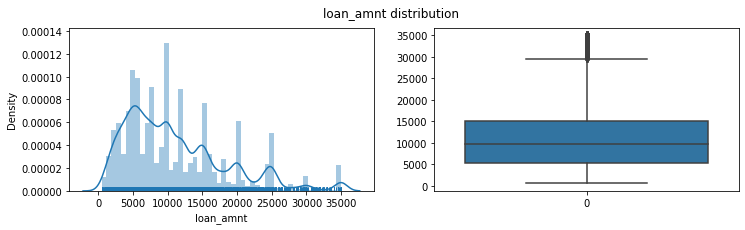

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
5%        2400.000000
10%       3090.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


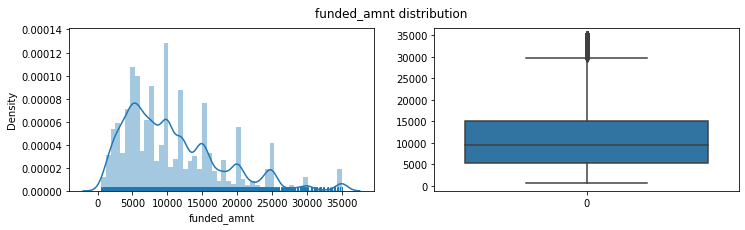

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
5%        2400.000000
10%       3000.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


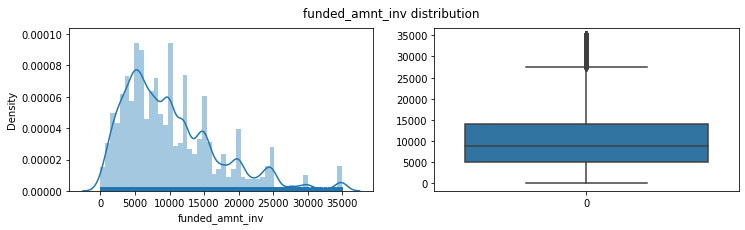

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
5%        1800.000000
10%       2825.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
90%      19975.000000
95%      24500.066590
99%      34715.012285
max      35000.000000
Name: funded_amnt_inv, dtype: float64


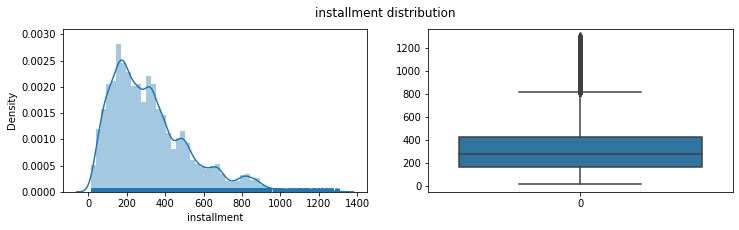

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
5%          70.610000
10%         98.990000
25%        165.740000
50%        277.860000
75%        425.550000
90%        620.900000
95%        760.820000
99%        931.090000
max       1305.190000
Name: installment, dtype: float64


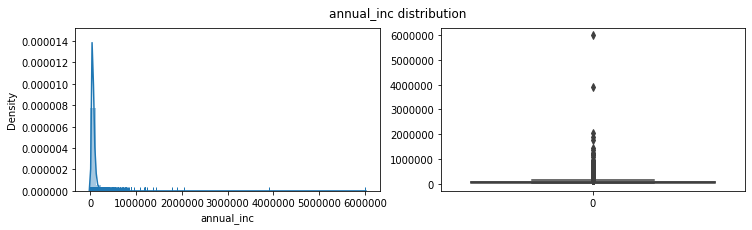

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64


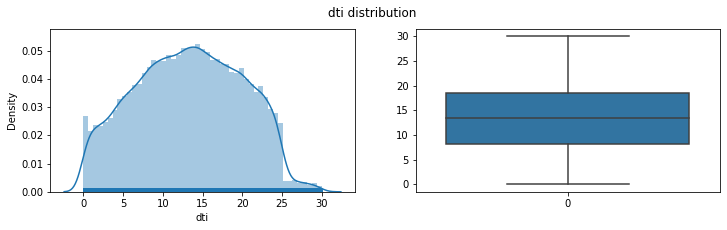

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
5%           2.100000
10%          4.060000
25%          8.130000
50%         13.370000
75%         18.560000
90%         22.290000
95%         23.800000
99%         26.530000
max         29.990000
Name: dti, dtype: float64


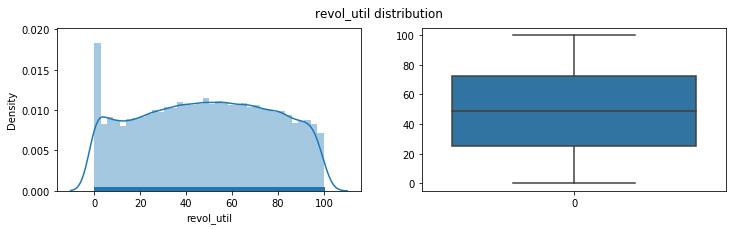

count    38577.000000
mean        48.688905
std         28.348968
min          0.000000
5%           2.600000
10%          8.436000
25%         25.200000
50%         49.000000
75%         72.200000
90%         87.800000
95%         93.500000
99%         98.500000
max         99.900000
Name: revol_util, dtype: float64


In [20]:
for i in Num_col:
    #Increasing the figure size of plot
    plt.figure(figsize=(12,3))
    #Setting subplot index
    plt.subplot(1,2,1)
    #Histogram plot
    sns.distplot(a=loan_df[i], rug=True,kde=True)
    plt.subplot(1,2,2)
    #Box plot
    sns.boxplot(data=loan_df[i])
    #Single title for both subplots.
    name = i + ' distribution '
    plt.suptitle(name)
    plt.show()
    print(loan_df[i].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]))

##### Observations:

### LOAN AMOUNT , FUNDED_AMNT, FUNDED_AMNT_INV

Most of the people took loan of 10K, mean is also around the same value
95% of the loans are below 25K
All 3 amounts are related since there plots looks almost the same, so more cohesion between them or they are directly related.

### INSTALLMENT AMOUNT

Most of the installment are between 0 to 200.
The median is 277 so most people have taken loan installment as this value

### ANNUAL INCOME

Most people have income between 30K and 58K

### DTI

No outliers for this column. People have been given loans if the ratio is less than 30

### Revol util utilization

Many people are not using the amount of available credit - 954 people are 0% utilization

## Categorical Univariate analysis

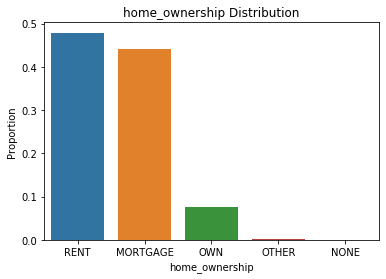

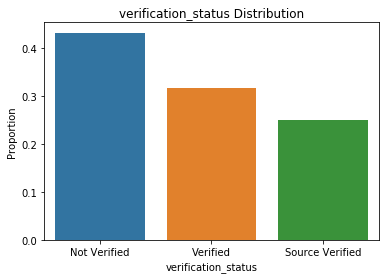

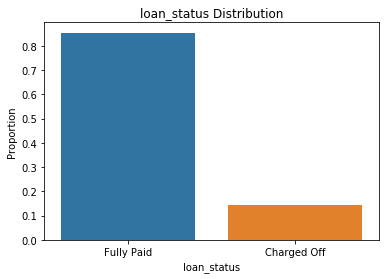

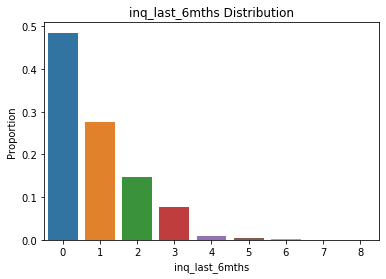

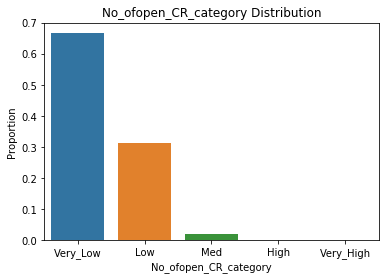

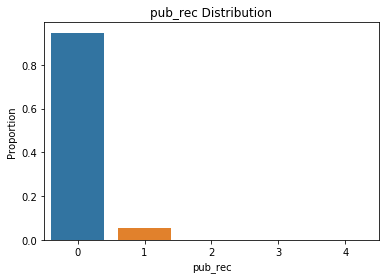

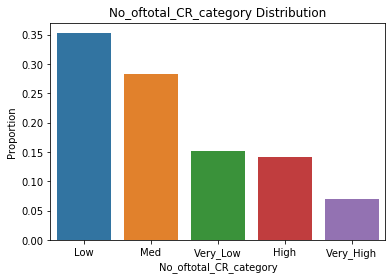

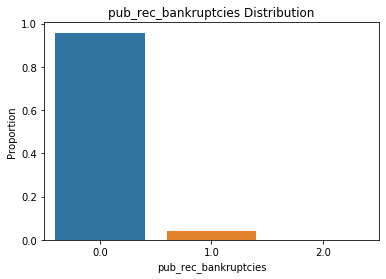

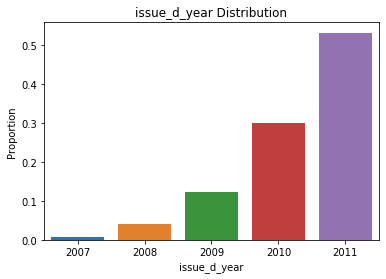

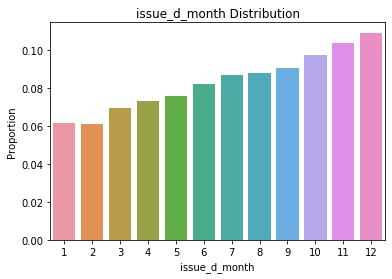

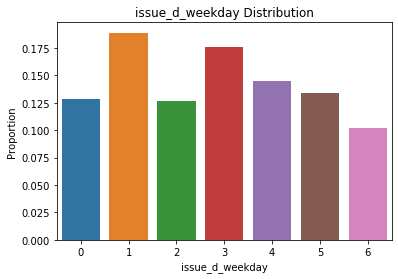

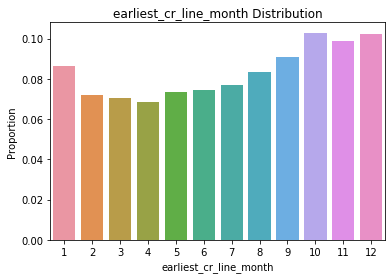

In [21]:
cate_col= ['home_ownership','verification_status','loan_status',
           'inq_last_6mths','No_ofopen_CR_category','pub_rec',
          'No_oftotal_CR_category','pub_rec_bankruptcies','issue_d_year','issue_d_month','issue_d_weekday',
          'earliest_cr_line_month']
for var in cate_col:
    #Probability / Percentage of each values
    prob_df = loan_df[var].value_counts(normalize=True).reset_index()
    sns.barplot(x='index', y=var, data=prob_df)
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.title(var+' Distribution')
    plt.show()

#### Observations


Home_ownership - People who are under rent or mortgage are more likely to take loan ##than people who have own house

source - Maximum number of loans is given to people who source is not verified

loan_status - Nearly 85 percent of loans have been fully paid, and only around 15 percent of loans have been charged-off

inq_last_6mths - Nearly 80 percent of the loans is taken by people who made one or no inquiries. As the number of inquiries increases, the probability of the borrower applying for the loan decreases

open_account - Lending club is giving more loans to the borrowers who are having less than 10 open credit lines

total_account - Lending club is giving almost 60 percent of loans to the borrowers who have less than 20 total number of credit lines

pub_rec - More than 95% of the loans are given to the borrowers who have 0 public records

pub_rec_bankruptcies - More than 95% of the loans are given to the borrowers who have 0 public record bankruptcies

issue_d_year - The number of loans lent by the LC doubled every year. More than 50% of the loans are given in the year 2011

issue_d_month - More number of loans are issued in the last quarter of the year as bank employees would be trying to reach the year end target for the loans in financial year 

issue_d_weekday - LC issued more loans on Tuesdays and Thursdays


### Term

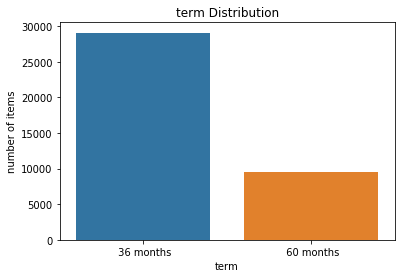

In [22]:

var = 'term'
sns.countplot(x=loan_df[var])
plt.xlabel(var)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show()

##### Observation

1. Out of the 2 terms plan available, more people opt for shorter team loan then a longer one.
2. the longer the time period the lesser number people take it, so it is also inversly proportional.

### Rate category

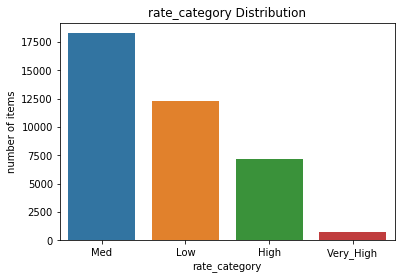

In [23]:
var = 'rate_category'
sns.countplot(x=loan_df[var],order=loan_df[var].value_counts().index)
plt.xlabel(var)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show() 

##### Observation

Out of the 4 category for interest rate people take loans where interest rate is between 10% to 15%.

### Grade

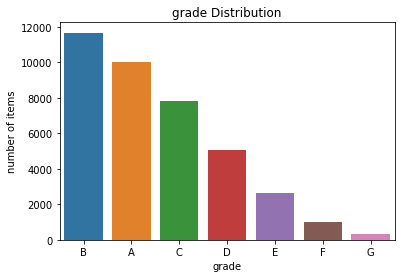

In [24]:

var = 'grade'
sns.countplot(x=loan_df[var],order=df[var].value_counts().index)
plt.xlabel(var)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show()


##### Observation

Grade - B & A grade loans are mostly taken in comparsion to all others available.

### Subgrade

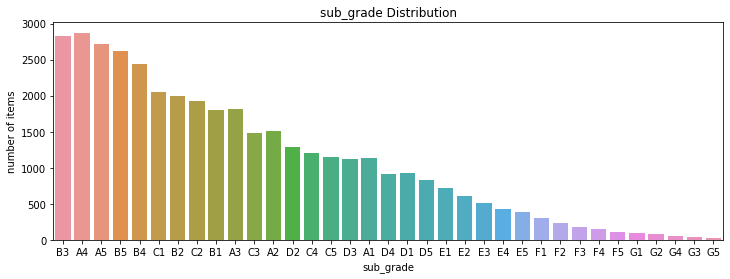

In [25]:

#Increasing the figure size of plot
plt.figure(figsize=(12,4))

var = 'sub_grade'
# Sort the unique values in alphabetical order
sorted_categories = sorted(df[var].unique())

#sns.countplot(x=loan_df[var],order=sorted_categories)
sns.countplot(x=loan_df[var],order=df[var].value_counts().index)
plt.xlabel(var)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show()

##### Observation

Out of A category - A4 is the most taken by the people  
Out of B category - B3 is the most taken by the people  
Out of C category - C1 is the most taken by the people  
Out of D category - D2 is the most taken by the people  
Out of E category - E1 is the most taken by the people  
Out of F category - F1 is the most taken by the people  
Majority of the loans are taken A4,B3,A5,B5 & B4.  
F & G category least contribute to the loans category taken by the people.  

### Employee length

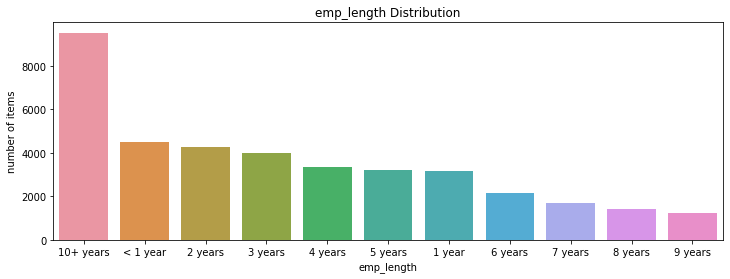

In [26]:
plt.figure(figsize=(12,4))
var = 'emp_length'
sns.countplot(x=loan_df[var],order=loan_df[var].value_counts().index)
plt.xlabel(var)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show()

##### Observation

People with most experience - 10+, are taking the maximun number of loans because it is a very broad category  
From 2 to 9 years - as the experience increases the number of people taking loan decreases  
So as the experience increase salary increases & people have already made assets so loan taking tedency decreases 

### Earliest credit line year

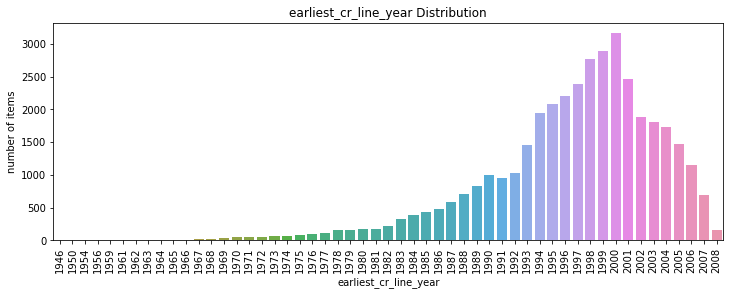

In [27]:
plt.figure(figsize=(12,4))

var = 'earliest_cr_line_year'
# Sort the unique values in alphabetical order
sorted_categories = sorted(loan_df[var].unique())

sns.countplot(x=loan_df[var],order=sorted_categories)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show()


##### Observation

Many of Loan borrowers of LC have got earlier credit line in 2000 year and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### Purpose

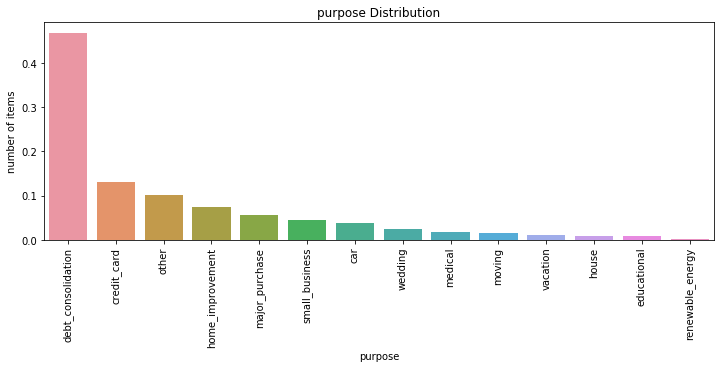

In [28]:
plt.figure(figsize=(12,4))
var = 'purpose'
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show()

##### Observation

Maximum number of loans are taken for Debt consolidation purpose

### Address state

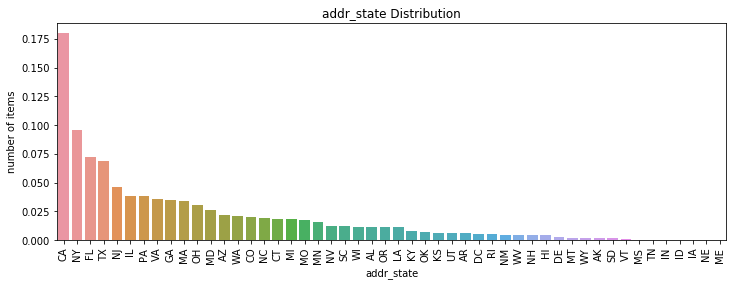

In [29]:
plt.figure(figsize=(12,4))
var = 'addr_state'
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('number of items')
plt.title(var+' Distribution')
plt.show()

##### Observation

Maximum number of loans are taken by people living in California

## Segmented univariate

In [30]:
Num_col = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','revol_util']
cate_col= ['term','rate_category','grade','sub_grade','emp_length','home_ownership','verification_status',
          'loan_status','purpose','addr_state','inq_last_6mths','No_ofopen_CR_category','pub_rec',
          'No_oftotal_CR_category','pub_rec_bankruptcies','issue_d_year','issue_d_month','issue_d_weekday',
          'earliest_cr_line_year','earliest_cr_line_month']

### Loan Amount vs Loan Status

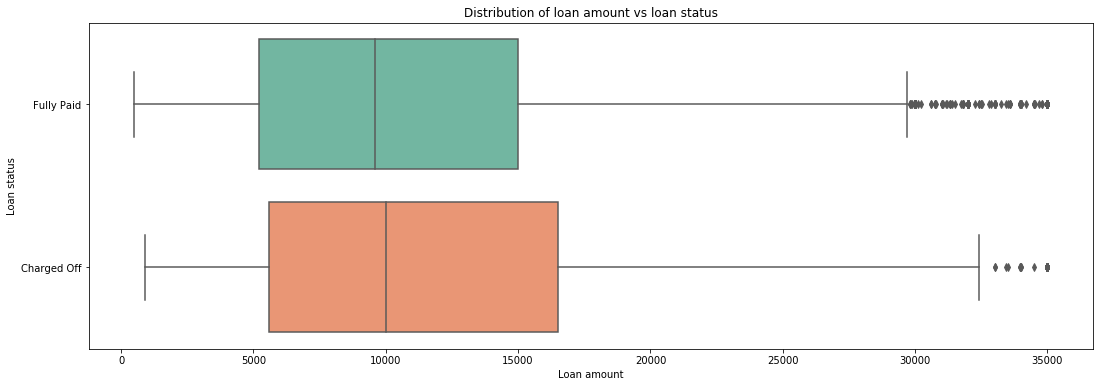

In [31]:
plt.figure(figsize=(18,6))
sns.boxplot(data=loan_df, x='loan_amnt', y='loan_status', palette='Set2')
plt.xlabel('Loan amount')
plt.ylabel('Loan status')
plt.title('Distribution of loan amount vs loan status')
plt.show()


##### Observation

The median and 25th percentile is almost same for both Fully Paid and Charged off loans but the 75th percentile 
is higher for Charged off loans. The loan amounts are higher for charged off people

### Loan Amount vs Term

plt.figure(figsize=(18,6))
sns.boxplot(data=loan_df, x='loan_amnt', y='term', palette='Set2')
plt.xlabel('Loan amount')
plt.ylabel('Term')
plt.title('Distribution of loan amount vs term')
plt.show()

##### Observation

The higher the loan amount,tenure is more

### Loan Amount vs Category

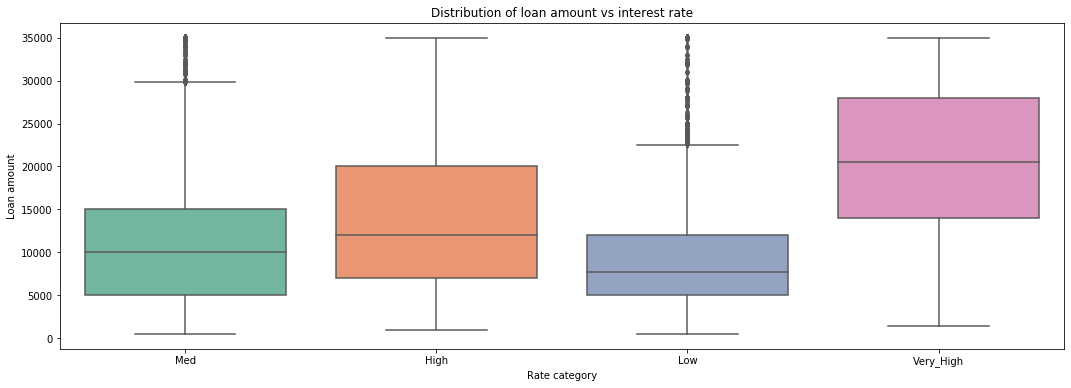

In [32]:
plt.figure(figsize=(18,6))
sns.boxplot(data=loan_df, y='loan_amnt', x='rate_category', palette='Set2')
plt.xlabel('Rate category')
plt.ylabel('Loan amount')
plt.title('Distribution of loan amount vs interest rate')
plt.show()

##### Observation

As the loan amount increases, the interest rate is increased by LC since higher loan amounts have higher risks

### Loan Amount vs Grade

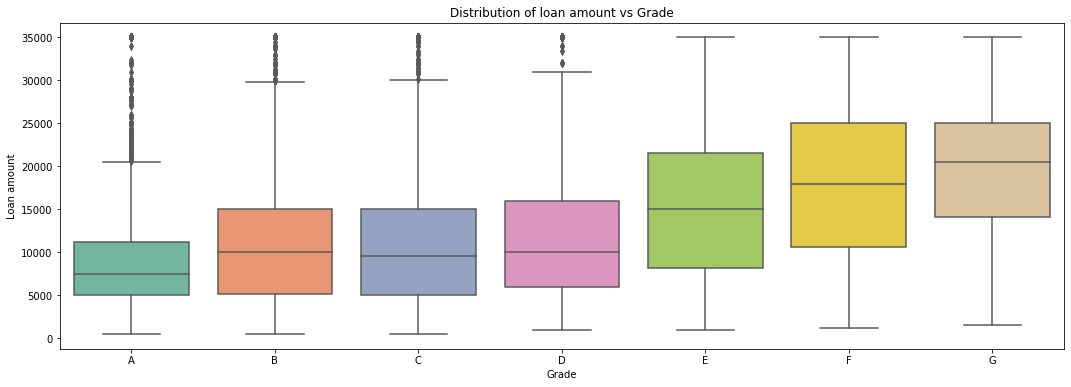

In [33]:
sorted_categories = sorted(loan_df['grade'].unique())
plt.figure(figsize=(18,6))
sns.boxplot(data=loan_df, x='grade', y='loan_amnt', order=sorted_categories, palette='Set2')
plt.xlabel('Grade')
plt.ylabel('Loan amount')
plt.title('Distribution of loan amount vs Grade')
plt.show()

##### Observation

There is an increasing trend in loan amount from grade A to G

### Loan Amount vs Home Ownership

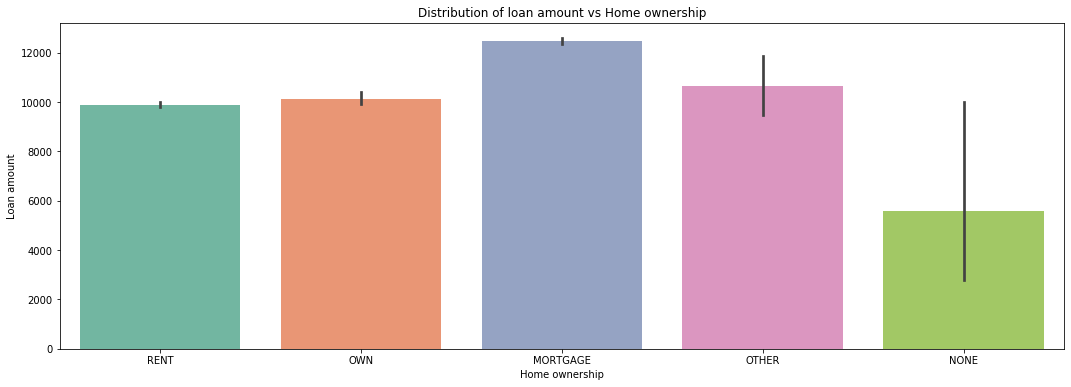

In [34]:
plt.figure(figsize=(18,6))
sns.barplot(data=loan_df, x='home_ownership', y='loan_amnt', palette='Set2')
plt.xlabel('Home ownership')
plt.ylabel('Loan amount')
plt.title('Distribution of loan amount vs Home ownership')
plt.show()

##### Observation

The loan amount is high around above 12000 for the borrowers who are on mortgage and  it is almost similar across rent, own and other which is around 10000

### Loan Amount vs Public Records

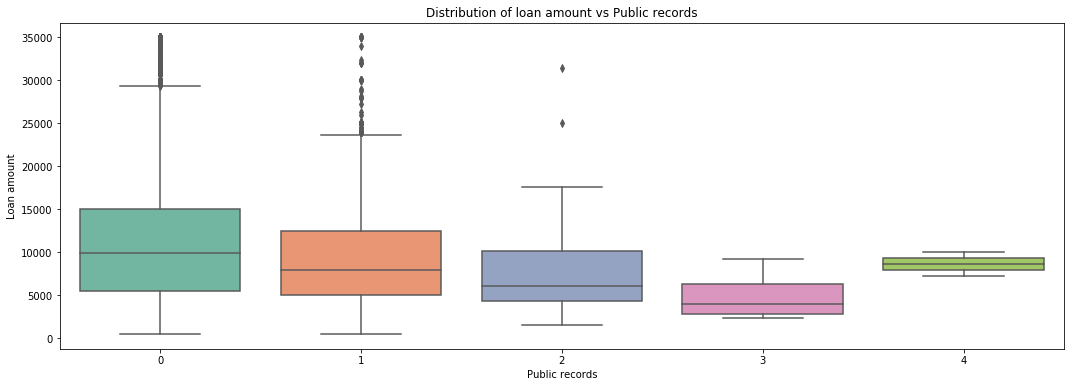

In [35]:
plt.figure(figsize=(18,6))
sns.boxplot(data=loan_df, x='pub_rec', y='loan_amnt', palette='Set2')
plt.xlabel('Public records')
plt.ylabel('Loan amount')
plt.title('Distribution of loan amount vs Public records')
plt.show()

##### Observation

Borrowers with one or zero public records have taken big amount of loans

### Loan Amount vs Issued Year

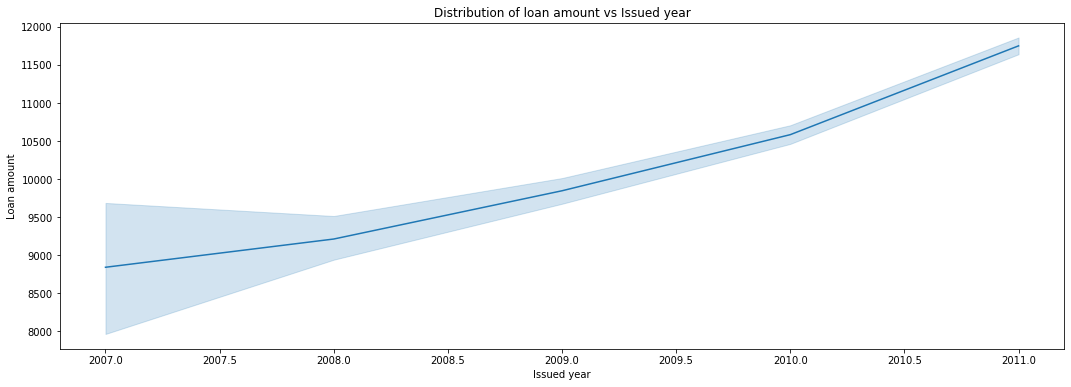

In [36]:
plt.figure(figsize=(18,6))
sns.lineplot(data=loan_df, x='issue_d_year', y='loan_amnt', palette='Set3')
plt.xlabel('Issued year')
plt.ylabel('Loan amount')
plt.title('Distribution of loan amount vs Issued year')
plt.show()

##### Observation

The loan amount lent by LC increased every year linearly

### Installment vs Loan Status

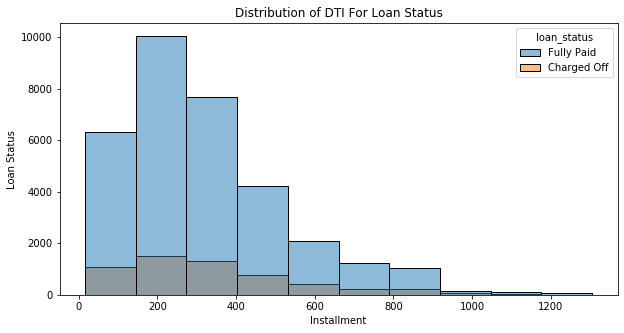

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='installment',hue='loan_status',bins=10)
plt.xlabel('Installment')
plt.ylabel('Loan Status')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

##### Observation

Installments below 100 are more likely to default the loan

### DTI vs Loan Status

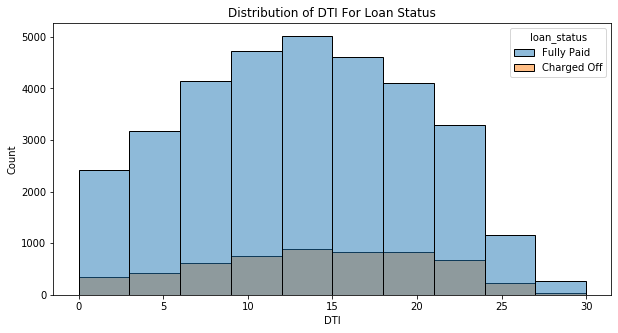

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

##### Observation

Higher the dti ratio, the higher is the chance of defaulting

### Annual income vs Term and Annual income vs Grade

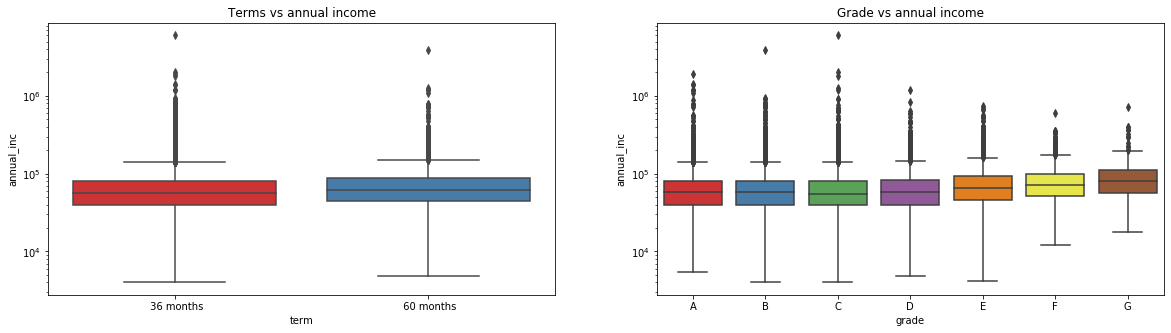

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_df.annual_inc, data=loan_df, palette="Set1")
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.annual_inc, order = grade_ord, data=loan_df, palette="Set1")
plt.yscale('log')

##### Observation

Annual income is comparitively higher for lower grades

### Annual income vs Loan Status

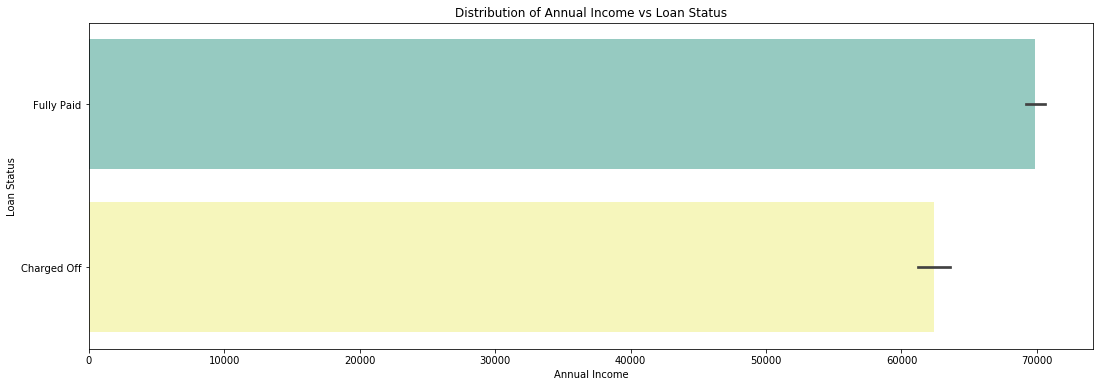

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(data=loan_df, x='annual_inc', y='loan_status', palette='Set3')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.title('Distribution of Annual Income vs Loan Status')
plt.show()

##### Observation

The annual income for Fully Paid and Charged off does not vary much, so no insights can be drawn from here

## BIVARIATE ANALYSIS

### Loan Amount vs Issued month

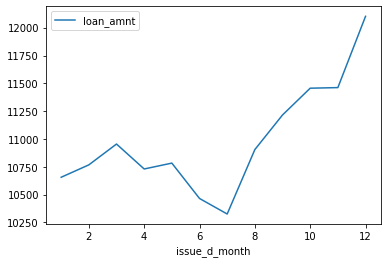

In [41]:
loan_df.groupby(by=['issue_d_month']).agg({'loan_amnt':'mean'}).plot()

##### Observation

The loan amount was minimum in july & it increase every month till Dec

In [42]:
# Removed loan_status, sub_grade
cate1_col= ['term','rate_category','grade','verification_status',
          'inq_last_6mths','No_ofopen_CR_category','pub_rec','issue_d_year']

### Loan status vs Categorical columns

         term  loan_status     id  proportion
0   36 months  Charged Off   3227    8.365088
1   36 months   Fully Paid  25869   67.058092
2   60 months  Charged Off   2400    6.221324
3   60 months   Fully Paid   7081   18.355497


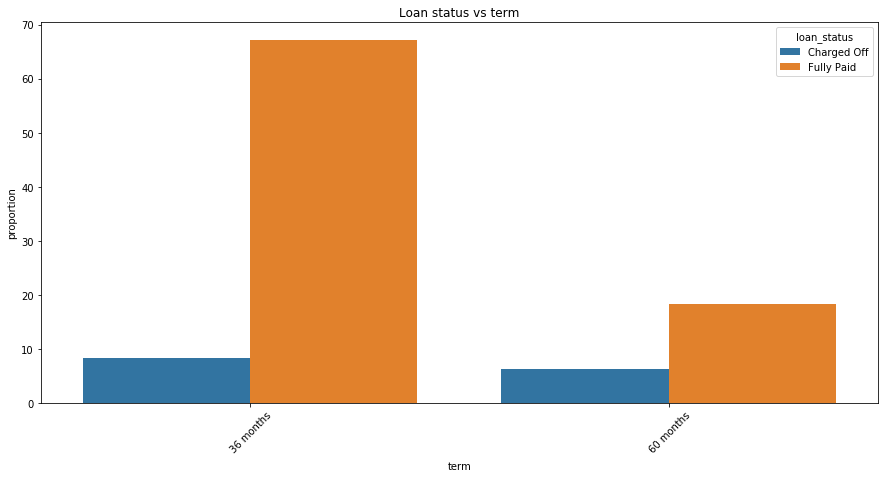

  rate_category  loan_status     id  proportion
0          High  Charged Off   1794    4.650439
1          High   Fully Paid   5432   14.080929
2           Low  Charged Off    830    2.151541
3           Low   Fully Paid  11486   29.774218
4           Med  Charged Off   2707    7.017135
5           Med   Fully Paid  15558   40.329730
6     Very_High  Charged Off    296    0.767297
7     Very_High   Fully Paid    474    1.228711


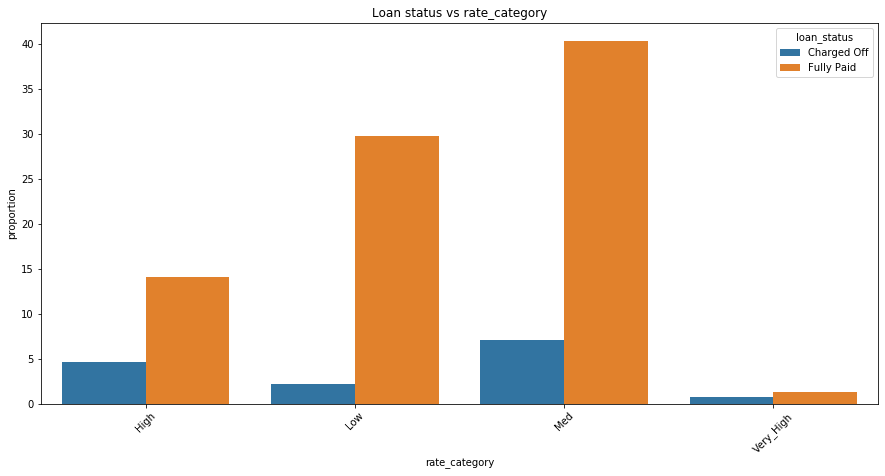

   grade  loan_status     id  proportion
0      A  Charged Off    602    1.560515
1      A   Fully Paid   9443   24.478316
2      B  Charged Off   1425    3.693911
3      B   Fully Paid  10250   26.570236
4      C  Charged Off   1347    3.491718
5      C   Fully Paid   6487   16.815719
6      D  Charged Off   1118    2.898100
7      D   Fully Paid   3967   10.283329
8      E  Charged Off    715    1.853436
9      E   Fully Paid   1948    5.049641
10     F  Charged Off    319    0.826918
11     F   Fully Paid    657    1.703087
12     G  Charged Off    101    0.261814
13     G   Fully Paid    198    0.513259


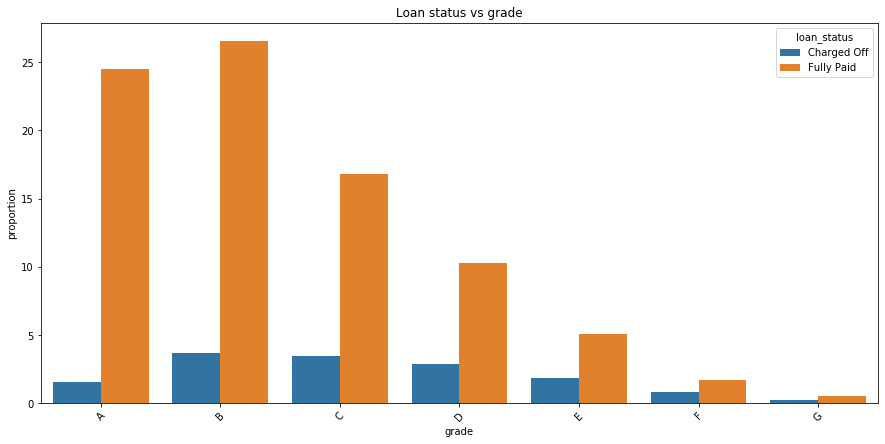

  verification_status  loan_status     id  proportion
0        Not Verified  Charged Off   2142    5.552531
1        Not Verified   Fully Paid  14552   37.721959
2     Source Verified  Charged Off   1434    3.717241
3     Source Verified   Fully Paid   8243   21.367654
4            Verified  Charged Off   2051    5.316639
5            Verified   Fully Paid  10155   26.323975


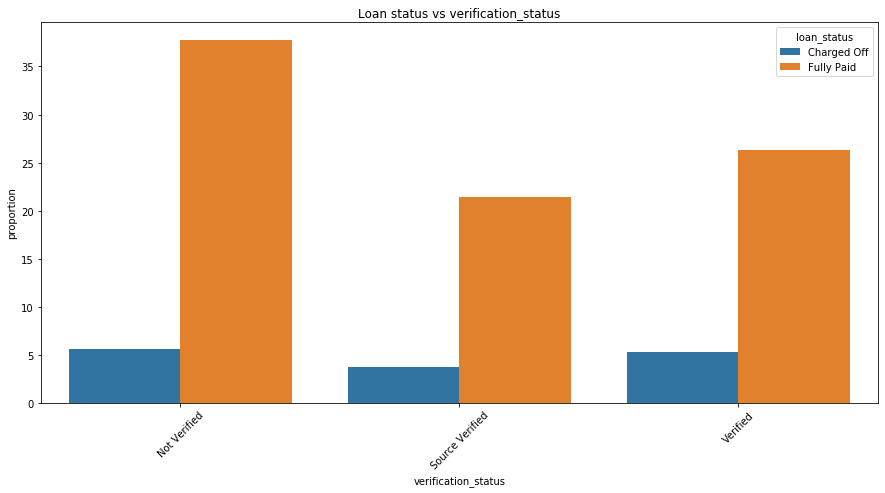

    inq_last_6mths  loan_status     id  proportion
0                0  Charged Off   2280    5.910257
1                0   Fully Paid  16429   42.587552
2                1  Charged Off   1677    4.347150
3                1   Fully Paid   8983   23.285896
4                2  Charged Off    943    2.444462
5                2   Fully Paid   4711   12.211940
6                3  Charged Off    619    1.604583
7                3   Fully Paid   2364    6.128004
8                4  Charged Off     51    0.132203
9                4   Fully Paid    265    0.686938
10               5  Charged Off     28    0.072582
11               5   Fully Paid    116    0.300697
12               6  Charged Off     16    0.041475
13               6   Fully Paid     47    0.121834
14               7  Charged Off     10    0.025922
15               7   Fully Paid     24    0.062213
16               8  Charged Off      3    0.007777
17               8   Fully Paid     11    0.028514


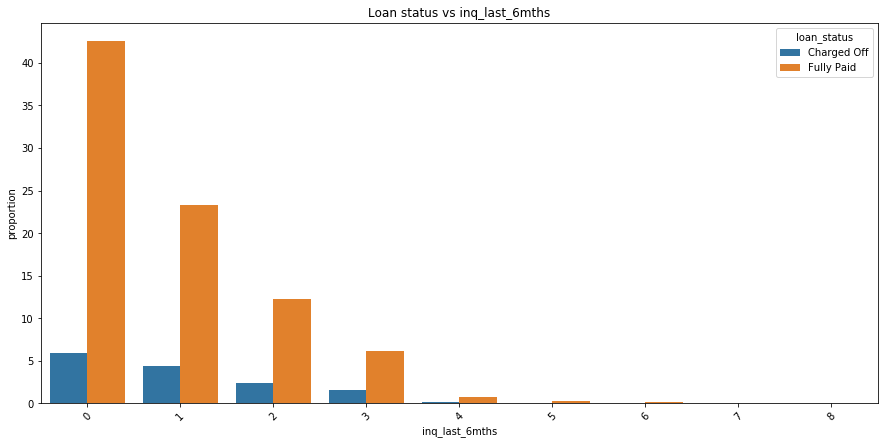

  No_ofopen_CR_category  loan_status     id  proportion
0                  High  Charged Off      8    0.020738
1                  High   Fully Paid     18    0.046660
2                   Low  Charged Off   1707    4.424916
3                   Low   Fully Paid  10390   26.933147
4                   Med  Charged Off    109    0.282552
5                   Med   Fully Paid    592    1.534593
6             Very_High   Fully Paid      3    0.007777
7              Very_Low  Charged Off   3803    9.858206
8              Very_Low   Fully Paid  21947   56.891412


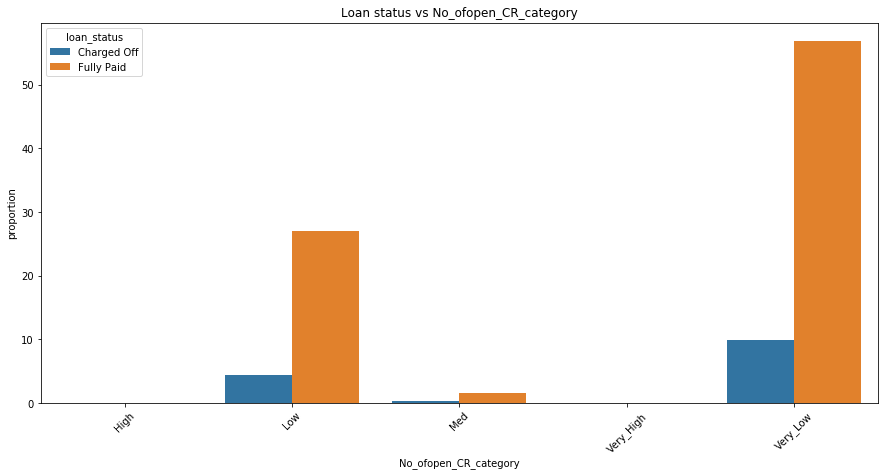

   pub_rec  loan_status     id  proportion
0        0  Charged Off   5160   13.375846
1        0   Fully Paid  31347   81.258263
2        1  Charged Off    457    1.184644
3        1   Fully Paid   1556    4.033491
4        2  Charged Off     10    0.025922
5        2   Fully Paid     38    0.098504
6        3   Fully Paid      7    0.018146
7        4   Fully Paid      2    0.005184


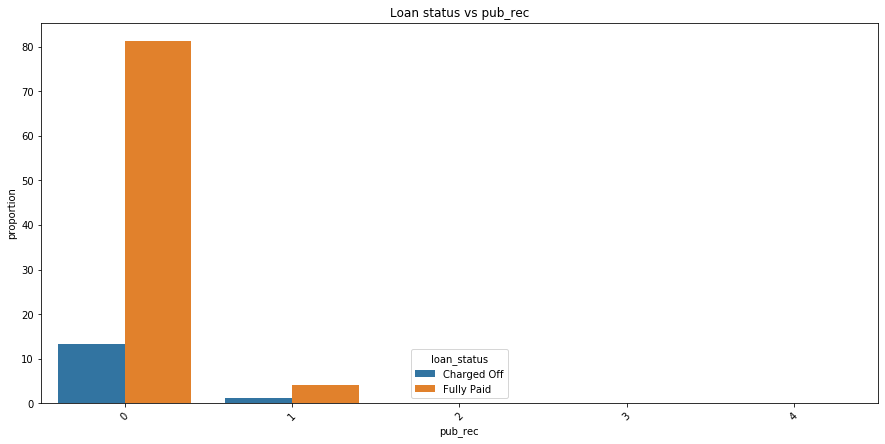

   issue_d_year  loan_status     id  proportion
0          2007  Charged Off     45    0.116650
1          2007   Fully Paid    206    0.533997
2          2008  Charged Off    247    0.640278
3          2008   Fully Paid   1315    3.408767
4          2009  Charged Off    594    1.539778
5          2009   Fully Paid   4122   10.685123
6          2010  Charged Off   1485    3.849444
7          2010   Fully Paid  10047   26.044016
8          2011  Charged Off   3256    8.440262
9          2011   Fully Paid  17260   44.741685


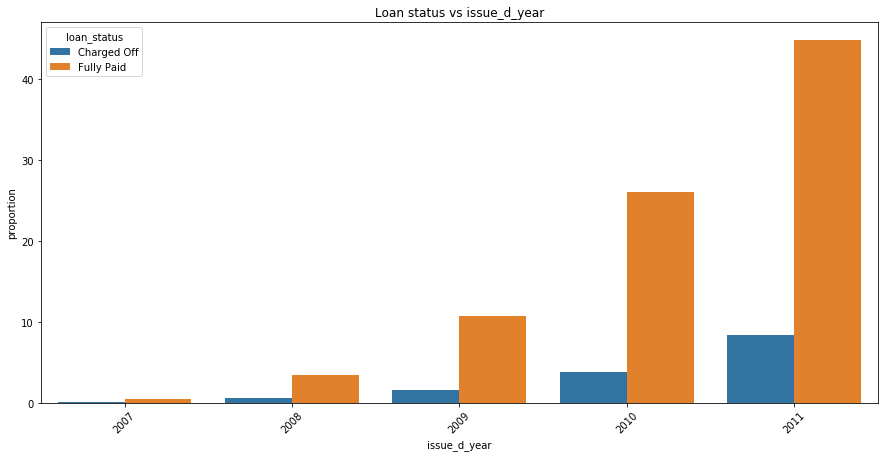

In [43]:
for i in cate1_col:
    plt.figure(figsize=(15,7))
    df1=loan_df.groupby(by=[i,'loan_status']).agg({'id':'count'}).reset_index()
    df1['proportion']=df1.groupby([i]).transform(lambda x: (100*x/df1.id.sum()))
    print(df1)
    sns.barplot(data=df1,x=i,y='proportion',hue='loan_status')
    plt.xticks(rotation=45)
    plt.title('Loan status vs '+i)
    plt.show()

##### Observation

#### Loan_status vs Term
The proportion of charged off borrowers is almost the same for both the terms 36/60.  
Out of 60 month tenure, the defaulters are approx. 33% while in 36 months it is less than 15% so longer tenure loan should be given with more cautious as proportion of defaulters are higher in that case.  

#### Loan status vs rate category
In Low catergory, the percentage of people defaulted is less than 10% & thus more such type of loans can be sanctioned & is beneficial for LC.  
In very high category & high, the percentage of people defaulted is more than 60% & 30% respectively, thus high interest rate loans have more chances of getting defaulted  

#### Loan status vs Grade
G & F grades have worst performance as more than 50% of defaulters are found in such grade types.  
B, C & D have defaulters which is almost the same in terms of %  
Best serving grade is A which has less than 10% defaulters  
LC should refrain from giving G & F & focus more on A  

#### Loan status vs verification status
Verified & not verified have same % of defaulters  
V - 20% S-17.5% NV-14.7  
Maximum no of borrowers do not have verified source of income but they have the least % of defaulters in comparison to  others. Looks like verification of income isn't playing any role in LC  

#### Loan status vs inq_last_6 months
As the inquiry increases the % of defaulters per inquiries also increases.  

#### Loan status vs pub_rec
For 1 or more than 1 pub records the %  of defaulters is more than 0 pub rec, so less number of loans should be given to such   borrowers

#### Loan status vs issue_d_year
The defaulters have increased by almost 2.5 times as compared to fully paid borrowers who have increased by nearly 1.7   
times from 2010 to 2011. So defaulters are increasing at more pace then fully paid.  


   grade        term    id  proportion
0      A   36 months  9650   25.014905
1      A   60 months   395    1.023926
2      B   36 months  9331   24.187988
3      B   60 months  2344    6.076159
4      C   36 months  5749   14.902662
5      C   60 months  2085    5.404775
6      D   36 months  3231    8.375457
7      D   60 months  1854    4.805972
8      E   36 months   868    2.250045
9      E   60 months  1795    4.653032
10     F   36 months   211    0.546958
11     F   60 months   765    1.983047
12     G   36 months    56    0.145164
13     G   60 months   243    0.629909


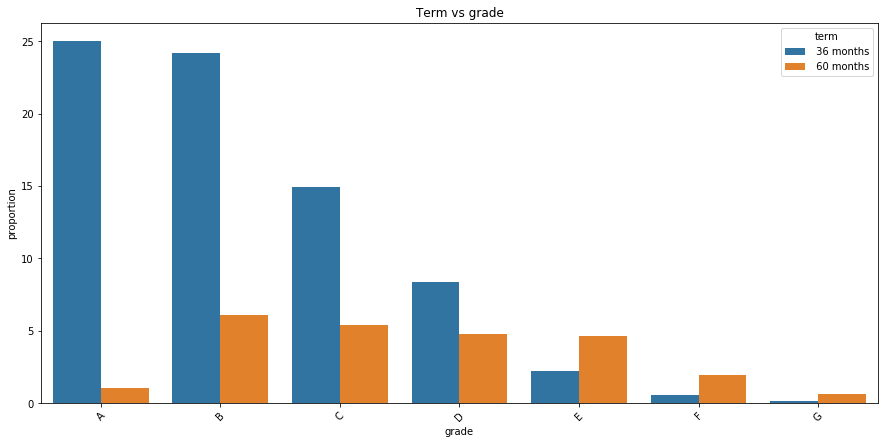

   pub_rec        term     id  proportion
0        0   36 months  27582   71.498561
1        0   60 months   8925   23.135547
2        1   36 months   1467    3.802784
3        1   60 months    546    1.415351
4        2   36 months     38    0.098504
5        2   60 months     10    0.025922
6        3   36 months      7    0.018146
7        4   36 months      2    0.005184


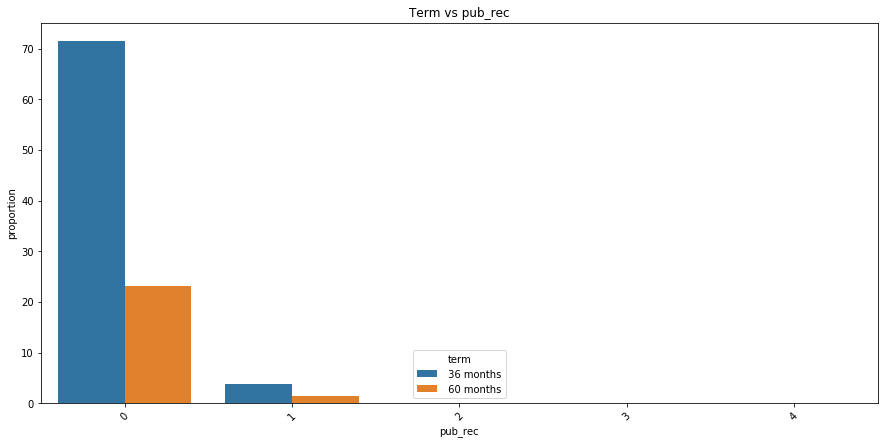

               purpose        term     id  proportion
0                  car   36 months    988    2.561112
1                  car   60 months    511    1.324623
2          credit_card   36 months   4091   10.604764
3          credit_card   60 months    936    2.426316
4   debt_consolidation   36 months  13131   34.038417
5   debt_consolidation   60 months   4924   12.764082
6          educational   36 months    309    0.800995
7          educational   60 months     16    0.041475
8     home_improvement   36 months   2079    5.389222
9     home_improvement   60 months    796    2.063406
10               house   36 months    260    0.673977
11               house   60 months    107    0.277367
12      major_purchase   36 months   1724    4.468984
13      major_purchase   60 months    426    1.104285
14             medical   36 months    528    1.368691
15             medical   60 months    153    0.396609
16              moving   36 months    483    1.252041
17              moving   60 

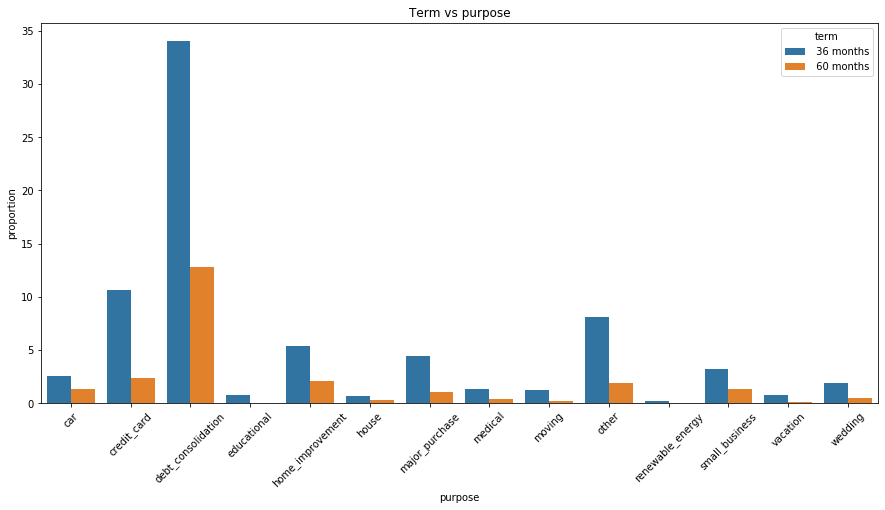

   issue_d_year        term     id  proportion
0          2007   36 months    251    0.650647
1          2008   36 months   1562    4.049045
2          2009   36 months   4716   12.224901
3          2010   36 months   8466   21.945719
4          2010   60 months   3066    7.947741
5          2011   36 months  14101   36.552868
6          2011   60 months   6415   16.629080


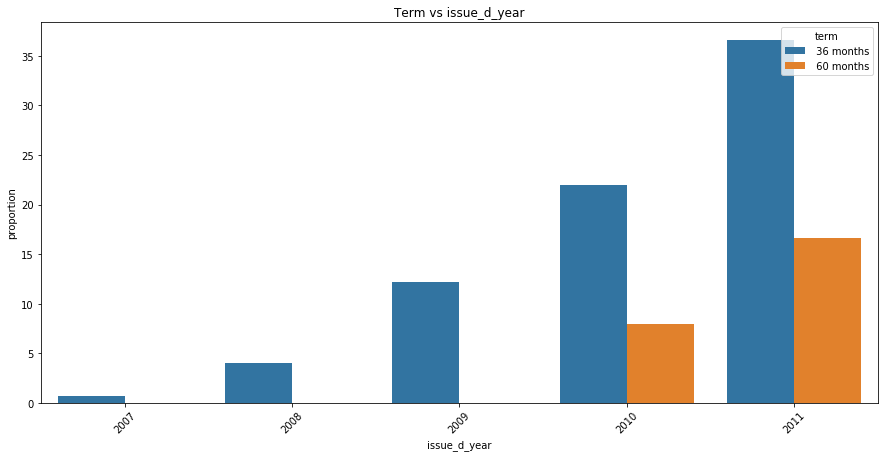

    issue_d_month        term    id  proportion
0               1   36 months  1948    5.049641
1               1   60 months   431    1.117246
2               2   36 months  1892    4.904477
3               2   60 months   466    1.207974
4               3   36 months  2086    5.407367
5               3   60 months   605    1.568292
6               4   36 months  2219    5.752132
7               4   60 months   612    1.586438
8               5   36 months  2100    5.443658
9               5   60 months   819    2.123027
10              6   36 months  2286    5.925811
11              6   60 months   894    2.317443
12              7   36 months  2518    6.527205
13              7   60 months   833    2.159318
14              8   36 months  2476    6.418332
15              8   60 months   912    2.364103
16              9   36 months  2541    6.586826
17              9   60 months   957    2.480753
18             10   36 months  2768    7.175260
19             10   60 months   993    2

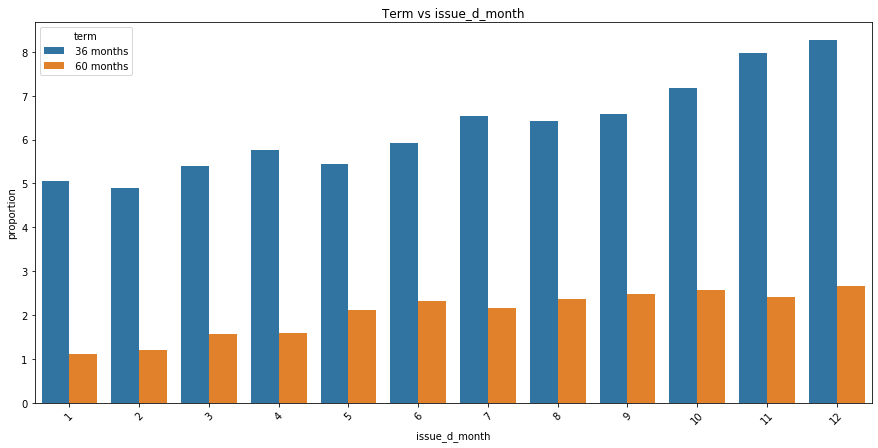

In [45]:
cate2_col=['grade','pub_rec','purpose','issue_d_year','issue_d_month']
for i in cate2_col:
    plt.figure(figsize=(15,7))
    df1=loan_df.groupby(by=[i,'term']).agg({'id':'count'}).reset_index()
    df1['proportion']=df1.groupby([i]).transform(lambda x: (100*x/df1.id.sum()))
    print(df1)
    sns.barplot(data=df1,x=i,y='proportion',hue='term')
    plt.xticks(rotation=45)
    plt.title('Term vs '+i)
    plt.show()


#### Observation

#### Term VS Grade
More no of Grade A loans are of shorter period  
More no of Grade E, F & G loans are of longer period  


#### Term VS Pub_rec
LC gave only shorter loans to 3 & 4 pub rec  
LC gave shorter:longer loans in the ratio of 3:1  

#### Term VS purpose
Major contribution of loans were done from debt consolidation & credit card  


#### Term VS issue_d_year
Before 2010, no loans were of 60 months  

#### Term VS issue_d_month
throughout the year, there is a linear increase in the no of 36 months loans  
while for 60 month progression can be seen almost as a constant  


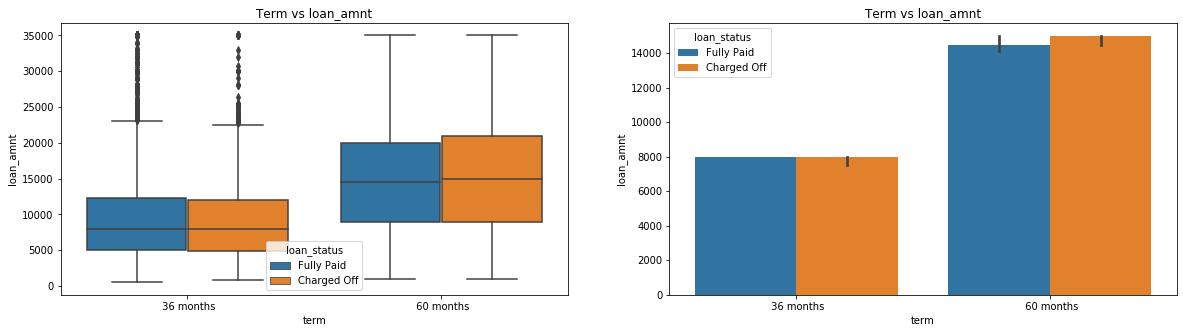

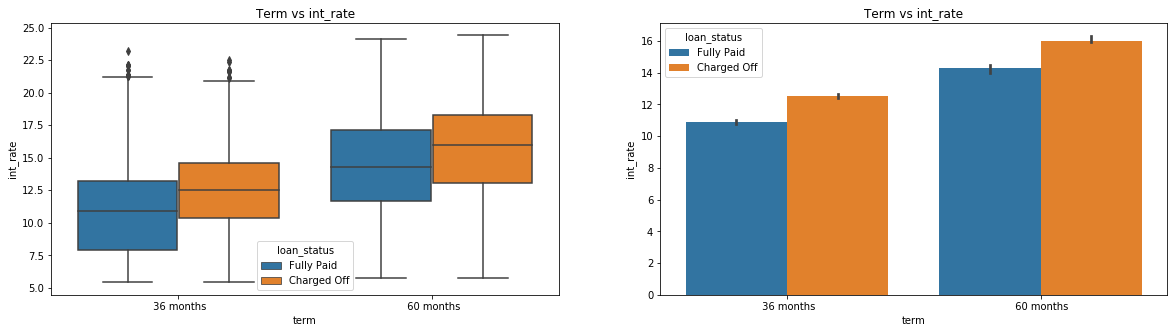

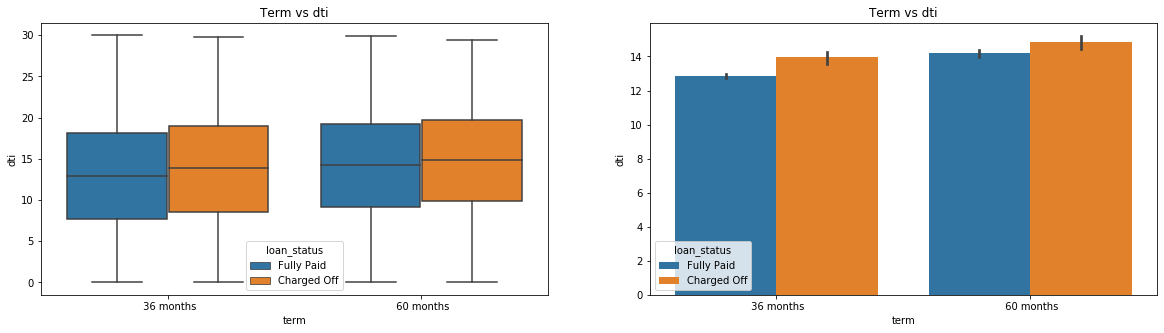

In [46]:
lis_num=['loan_amnt','int_rate','dti']
for i in lis_num:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.boxplot(x='term', y=i, hue='loan_status', data=loan_df)
    plt.title('Term vs '+i)
    plt.subplot(122)
    sns.barplot(x='term', y=i, hue='loan_status', data=loan_df, estimator=np.median)
    plt.title('Term vs '+i)
    plt.show()

#### Observation

#### Term VS Loan_amnt
Loan amount doesn't distinguish between term plans  
loan status is similar for term & loan status  

#### Term VS int_rate
In both the term plans, int rate for defaulters is higher than fully paid borrowers  


#### Term VS DTI
DTI is slightly better for charged off borrowers meaning when borrower's debt is more they are more likely to default  

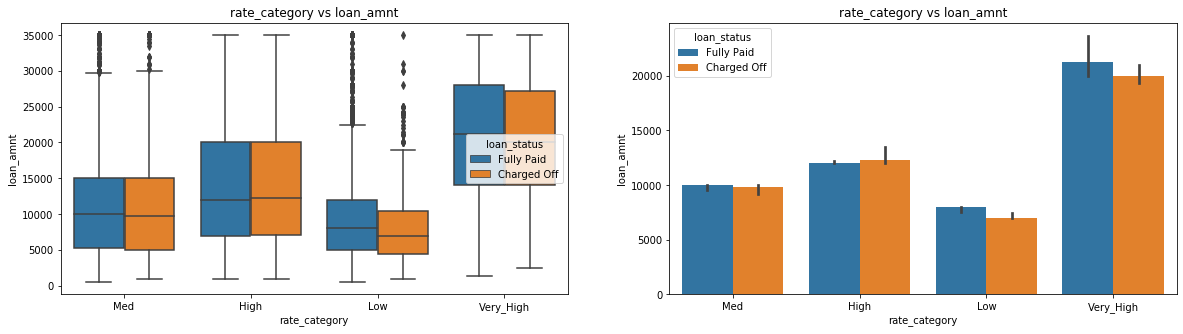

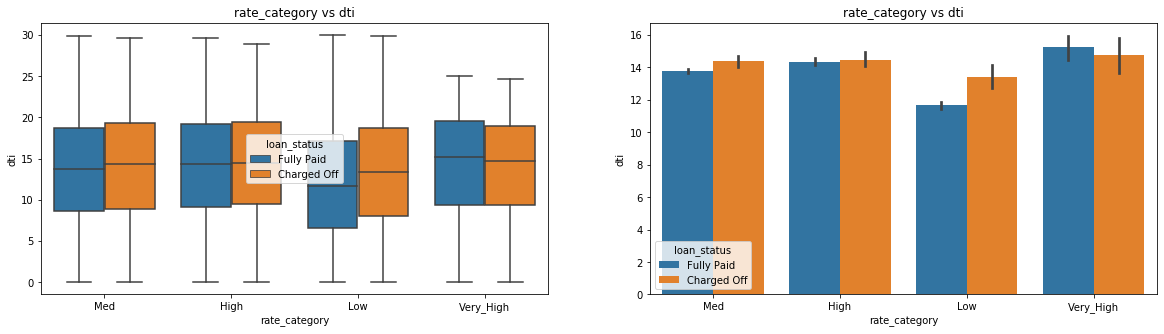

In [47]:
lis_num=['loan_amnt','dti']
for i in lis_num:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.boxplot(x='rate_category', y=i, hue='loan_status', data=loan_df)
    plt.title('rate_category vs '+i)
    plt.subplot(122)
    sns.barplot(x='rate_category', y=i, hue='loan_status', data=loan_df, estimator=np.median)
    plt.title('rate_category vs '+i)
    plt.show()

#### Observation

#### rate_category VS Loan_amnt
Loan amount increases when rate increases  
Except for low, in all other categories for rate of interest the fully paid & defaulters are almost same.  


#### rate_category VS DTI
DTI is slightly better for charged off borrowers in each of the rate of interest categories except for very high category.  

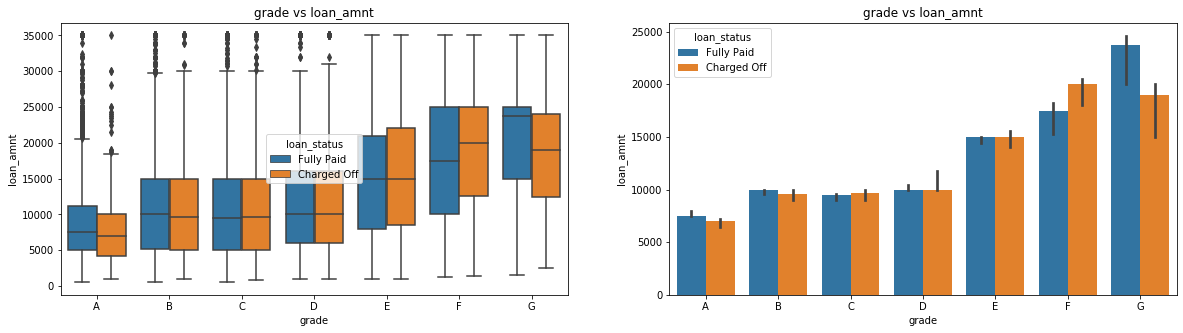

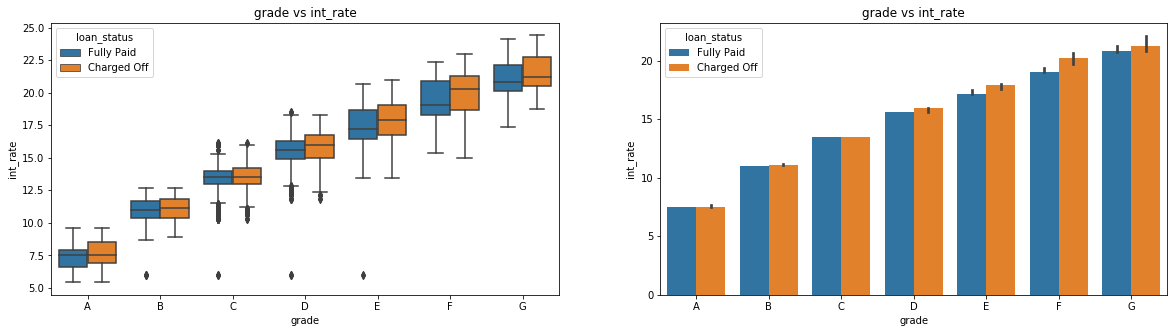

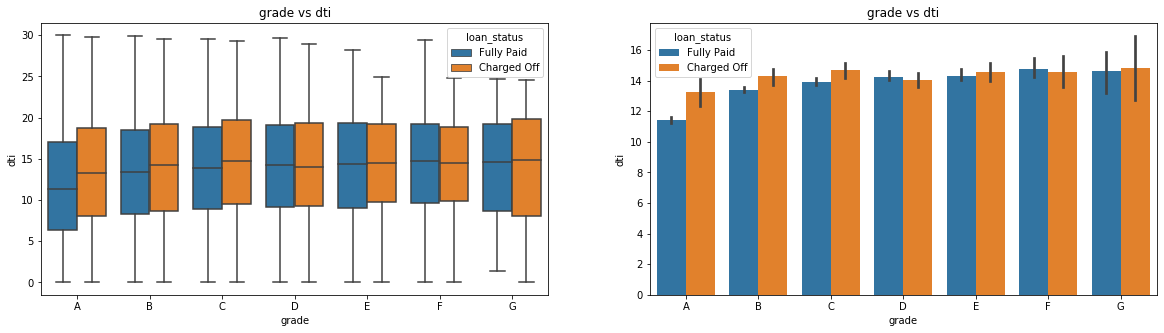

In [49]:
lis_num=['loan_amnt','int_rate','dti']
var='grade'
for i in lis_num:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    # Sort the unique values in alphabetical order
    sorted_categories = sorted(loan_df[var].unique())
    sns.boxplot(x=var, y=i, hue='loan_status',order=sorted_categories, data=loan_df)
    plt.title(var+' vs '+i)
    plt.subplot(122)
    sns.barplot(x=var, y=i, hue='loan_status', order=sorted_categories,data=loan_df, estimator=np.median)
    plt.title(var+' vs '+i)
    plt.show()

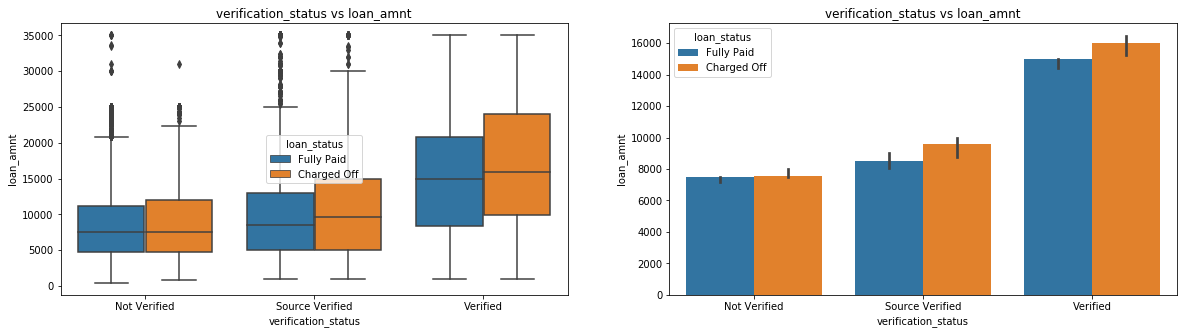

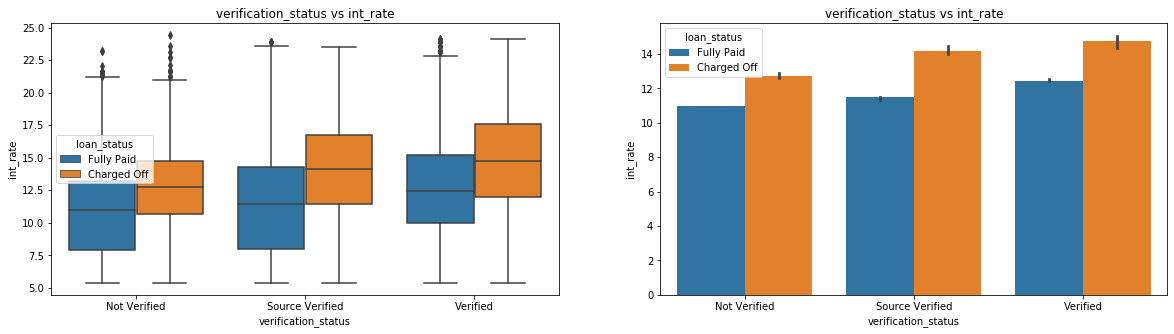

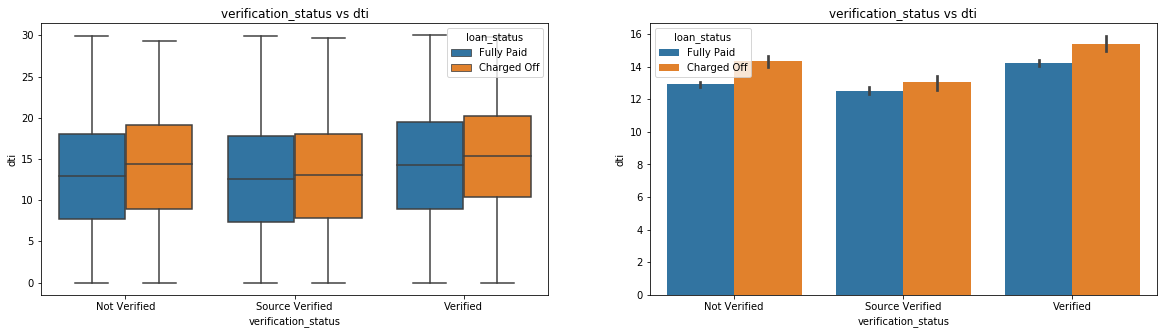

In [50]:
lis_num=['loan_amnt','int_rate','dti']
var='verification_status'
for i in lis_num:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    # Sort the unique values in alphabetical order
    sorted_categories = sorted(loan_df[var].unique())
    sns.boxplot(x=var, y=i, hue='loan_status',order=sorted_categories, data=loan_df)
    plt.title(var+' vs '+i)
    plt.subplot(122)
    sns.barplot(x=var, y=i, hue='loan_status', order=sorted_categories,data=loan_df, estimator=np.median)
    plt.title(var+' vs '+i)
    plt.show()

#### Observation

#### Grade VS Loan_amnt
From A to G loan amount increases  
B,C, D & E the defaulters & fully paid are almost same  
F has worst performance  


#### Grade VS DTI
DTI is slightly better for charged off borrowers in each of the grade categories  

#### Grade VS int_rate
As grade goes from A to G, the rate of interest interest increases linearly and so does defaulters   


#### verification_status VS Loan_amnt
For source verified & verified, the defaulters are more  


#### verification_status VS DTI
DTI is slightly more for defaulters in all 3 categories of verification status  

#### verification_status VS int_rate
rate of interest is always more for defaulters in all 3 categories  

Text(0.5, 1.0, 'Terms vs annual income')

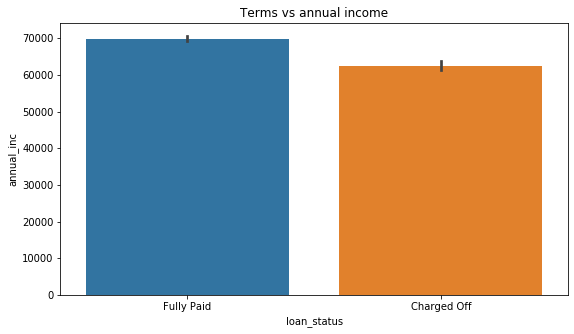

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='loan_status', y=loan_df.annual_inc, data=loan_df)
plt.title('Terms vs annual income')

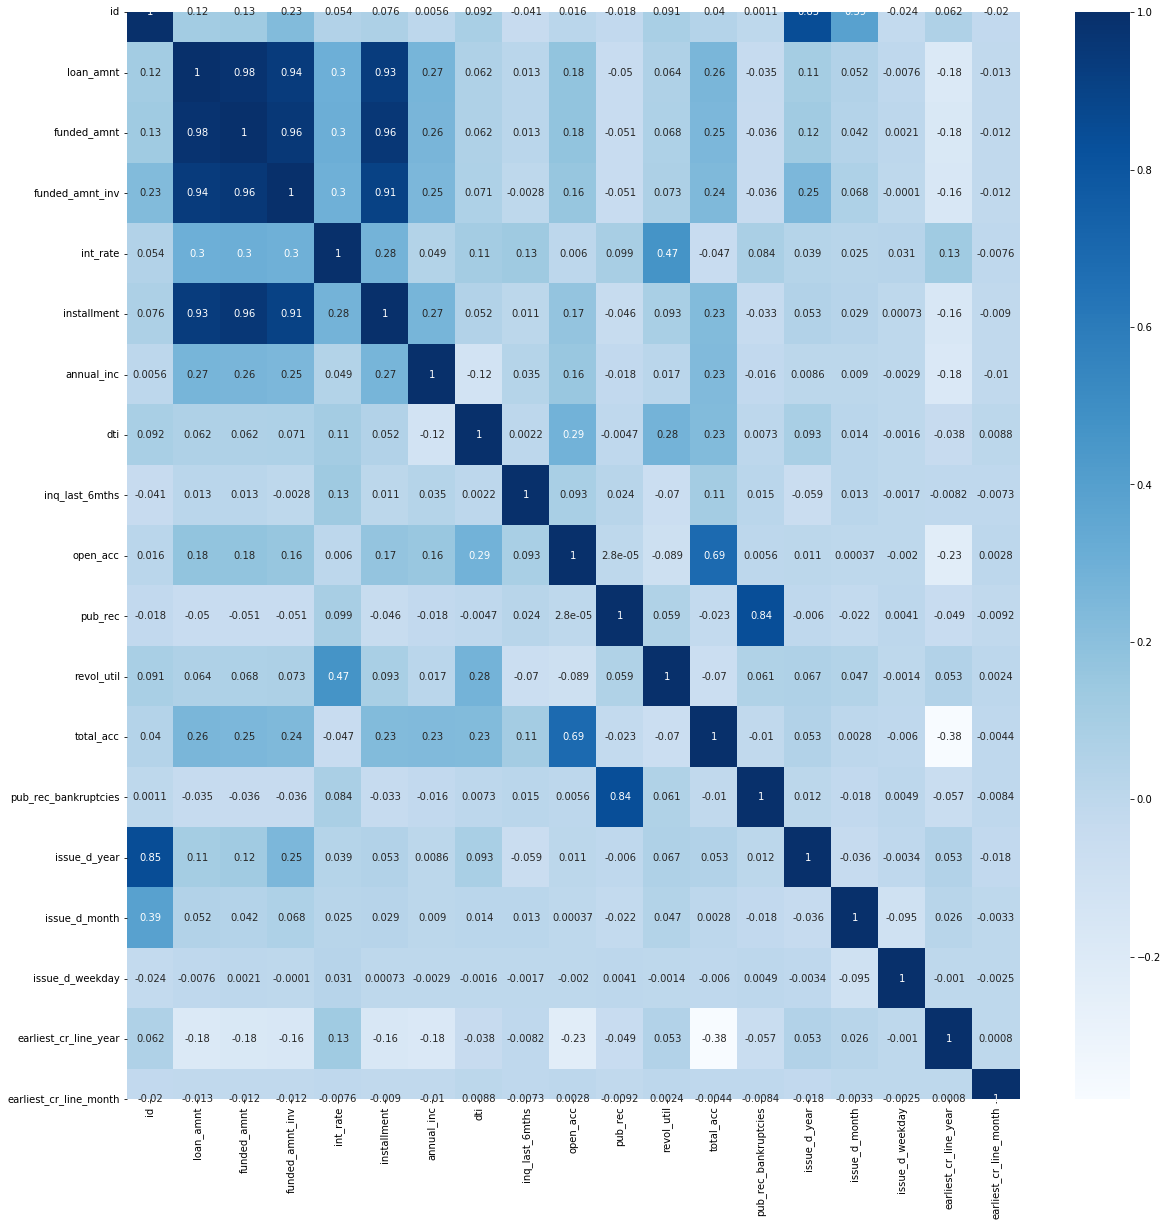

In [55]:
#Heat map for numerical VS numerical columns
plt.figure(figsize=(20,20))
sns.heatmap(loan_df.corr(),annot=True,cmap='Blues')
plt.show()

## Loan amount, funded amount, funded amount invest & installment are highly correlated with each other & 
## have direct relationship
## The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.

#### Recommendations:
1. Borrowers with higher incomes have lower default rates.  
Resolution: Verify income levels & consider stable income in loan approval processes.   
2. Employment Length and Defaulters: Longer employment duration correlates with lower default rates.  
Resolution: Sanction more loans to more xp borrowers  
3. Longer loan terms often increase the likelihood of default due to prolonged repayment periods.  
Resolution: emphasise on shorter period loans more  
4. Higher interest rates correlate with higher charged offs   
Resolution: Offer competitive rates to lower-risk borrowers. More frequently access high interest loans.  
5. Larger loan amounts tend to have higher risk of defaulting  
Resolution: Implement stricter credit checks or take guarantee as assets for higher loan amounts.  
6. Focus on grade A more than F,G & H  
Resolution: Try to give more grade A loans to the borrowers  
7. As the inquiry increases the % of defaulters per inquiries also increases.  
Resolution: Regularly Check for inquiries done by borrowers before giving out on loans  
8. For 1 or more than 1 pub records the %  of defaulters is more than 0 pub rec  
Resolution: so less number of loans should be given to such borrowers  